# Market Segmentation Example

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

### Load Data

In [2]:
data = pd.read_csv("https://docs.google.com/spreadsheets/d/1BqHAO77ui4EzWYBavcdbCHiYygw-u7cdC7mOyRhOAMw/export?gid=1942131135&format=csv")
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


### Plot the Data

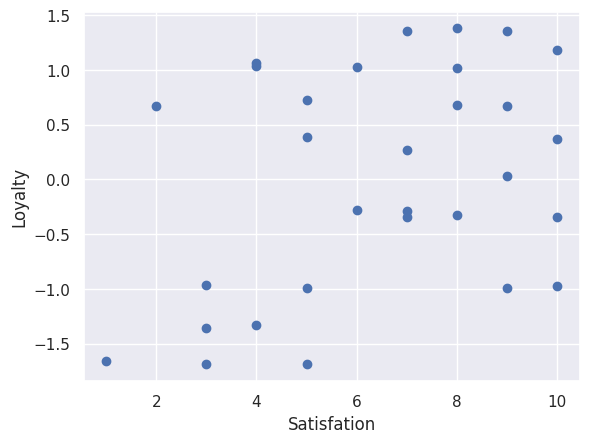

In [3]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel("Satisfation")
plt.ylabel("Loyalty")
plt.show();

### Clustering 

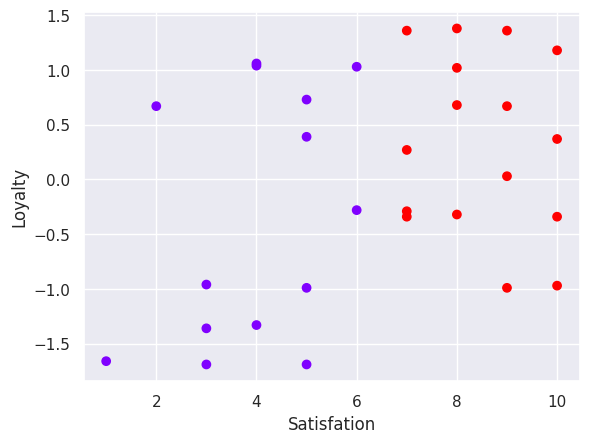

In [4]:
x = data.copy()

kmeans = KMeans(2, n_init='auto')
kmeans.fit(x)

clusters = x.copy()
clusters["cluster_pred"] = kmeans.fit_predict(x)

plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c=clusters['cluster_pred'], cmap='rainbow')
plt.xlabel("Satisfation")
plt.ylabel("Loyalty")
plt.show();

Since here the model considered 'Satisfation' as only fature but 'Loyality' is also a feature but its missed so we standardize both variable to fix the problem

### Standardize the variable

In [5]:
# Here Loyality is already standardize if we standardize it again it will give same result
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

### Usinng the Elbow Method

In [6]:
np.random.seed(42)
wcss = []
for i in range(1,10):
    kmeans = KMeans(i, n_init='auto')
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

wcss

[60.0,
 29.818973034723147,
 23.002862476299875,
 10.24718180592842,
 7.792695153937187,
 6.571285077136385,
 6.49899846008148,
 5.954431338721906,
 4.044831665660763]

Text(0, 0.5, 'Within-cluster Sum of Squares')

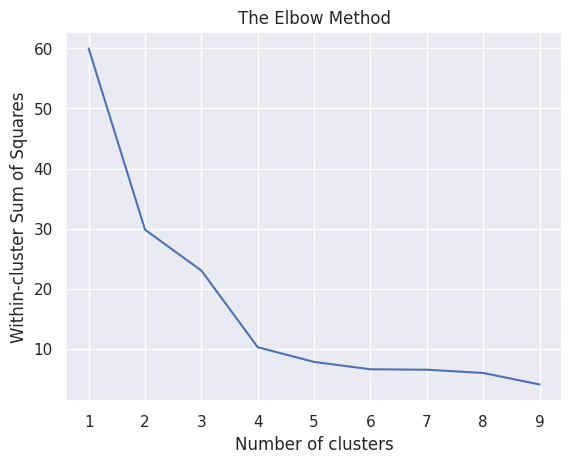

In [7]:
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

### Exploring Clustering solution and selecting number of cluster

In [12]:
kmeans_new = KMeans(4, n_init='auto')
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_preds'] = kmeans_new.fit_predict(x_scaled)
clusters_new.head()

,Satisfaction,Loyalty,cluster_preds
0,4,-1.33,0
1,6,-0.28,2
2,5,-0.99,0
3,7,-0.29,2
4,4,1.06,3


Here we have used the non-standardized data to plot with standardized output(`cluster_preds`)

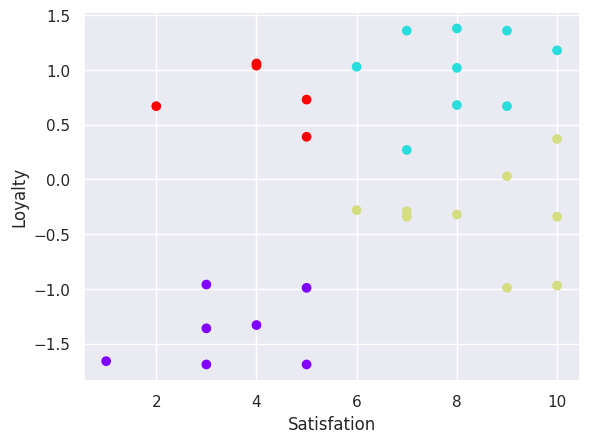

In [13]:
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c=clusters_new['cluster_preds'], cmap='rainbow')
plt.xlabel("Satisfation")
plt.ylabel("Loyalty")
plt.show();